In [5]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with your file path)
df = pd.read_csv('/content/wine.csv')

# Basic data exploration
print("First few rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())


First few rows of the dataset:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data column

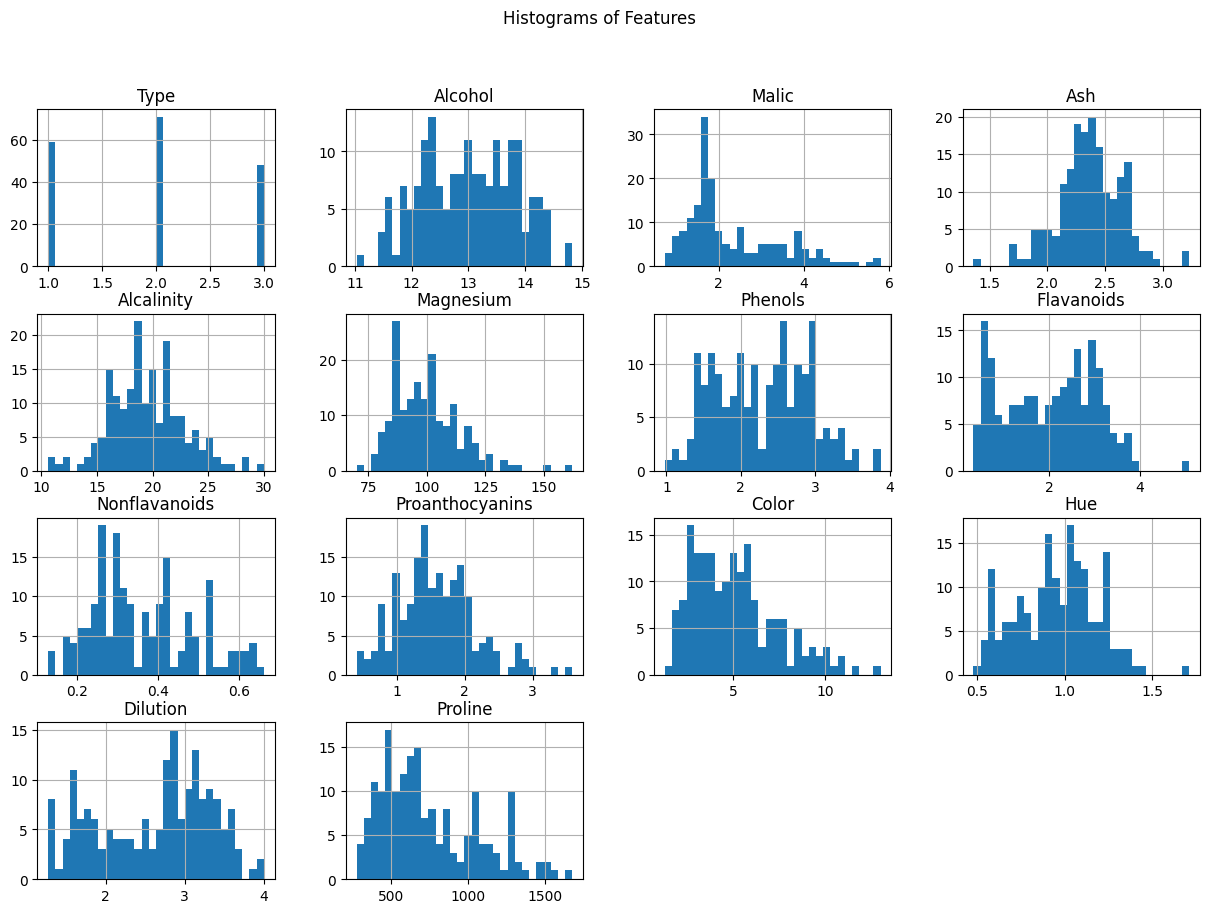

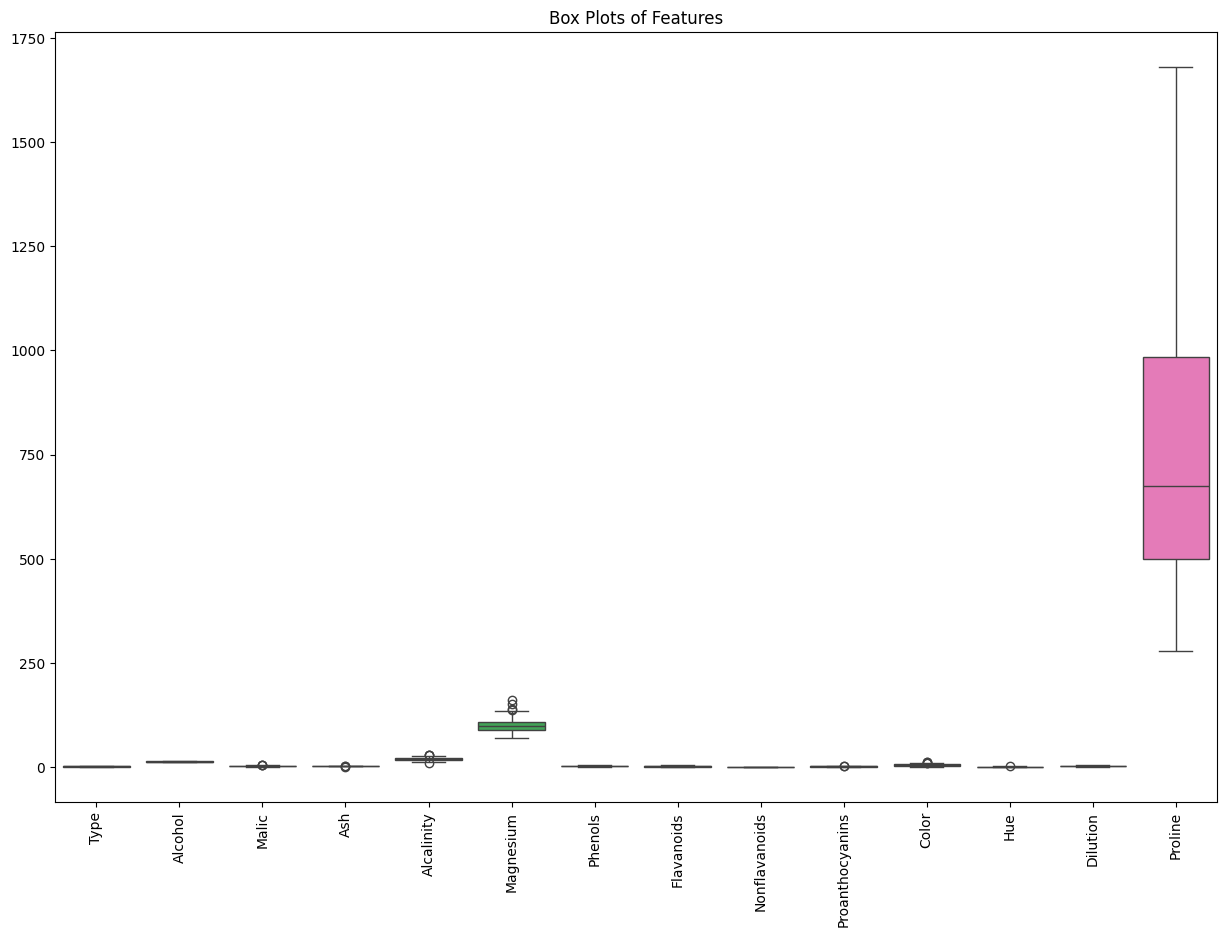

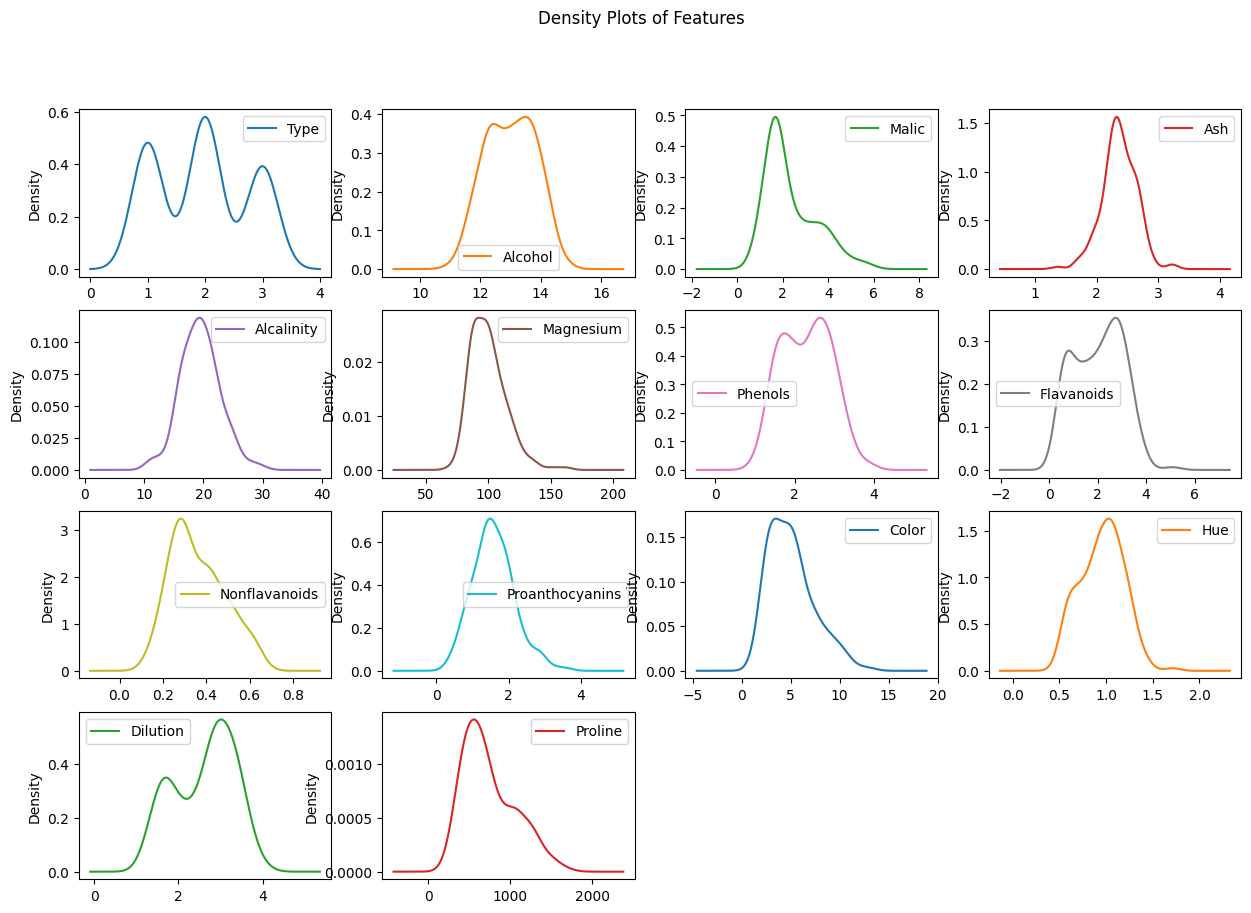

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots of Features')
plt.show()

# Density plots
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(15, 10))
plt.suptitle('Density Plots of Features')
plt.show()


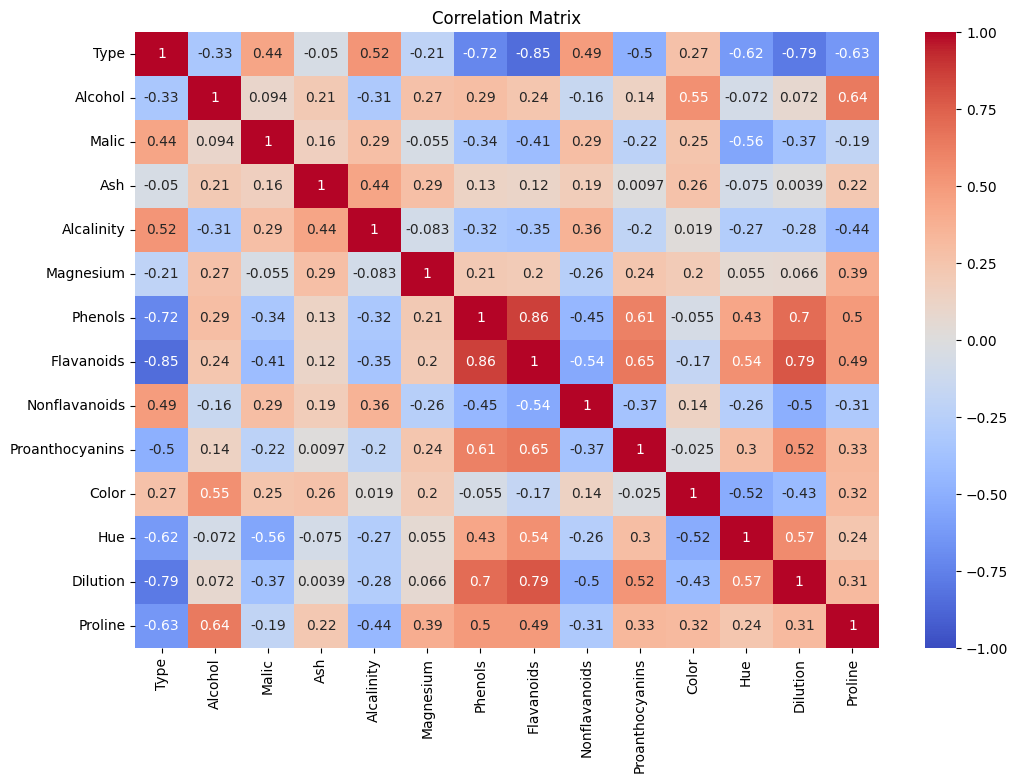

In [7]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


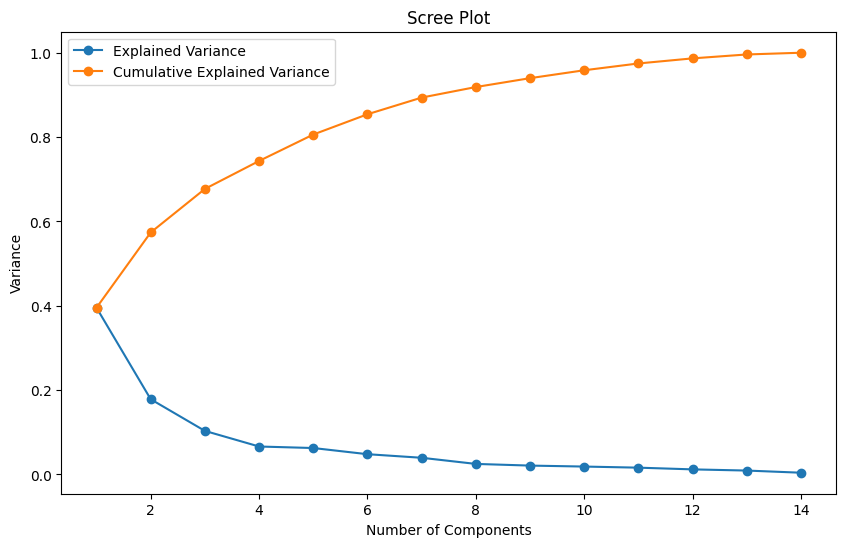

Explained variance ratio: [0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615 0.01613203 0.01205691
 0.00925458 0.00412945]
Cumulative explained variance: [0.39542486 0.57378745 0.67707846 0.74335831 0.80603706 0.85409266
 0.89364973 0.91865217 0.93969088 0.95842703 0.97455906 0.98661596
 0.99587055 1.        ]


In [9]:
from sklearn.decomposition import PCA
import numpy as np

# PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.legend()
plt.title('Scree Plot')
plt.show()

# Print explained variance
print("Explained variance ratio:", explained_variance)
print("Cumulative explained variance:", cumulative_variance)


In [10]:
# Choose the number of components (e.g., 2 for visualization)
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])

print("PCA-transformed dataset:")
print(df_pca.head())


PCA-transformed dataset:
        PC1       PC2
0 -3.522934 -1.453098
1 -2.528858  0.330019
2 -2.785029 -1.036936
3 -3.922588 -2.768210
4 -1.407511 -0.867773


In [11]:
from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters
df['cluster'] = kmeans.fit_predict(df_scaled)

print("Original dataset with clusters:")
print(df.head())


Original dataset with clusters:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  cluster  
0           0.28             2.29   5.64  1.04      3.92     1065        0  
1           0.26             1.28   4.38  1.05      3.40     1050        0  
2           0.30             2.81   5.68  1.03      3.17     1185        0  
3           0.24             2.18   7.80  0.86      3.45     1480        0  
4           0.39             1.82   4.32  1.04      2.93      735        0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters
df['cluster'] = kmeans.fit_predict(df_scaled)

print("Original dataset with clusters:")
print(df.head())


Original dataset with clusters:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  cluster  
0           0.28             2.29   5.64  1.04      3.92     1065        0  
1           0.26             1.28   4.38  1.05      3.40     1050        0  
2           0.30             2.81   5.68  1.03      3.17     1185        0  
3           0.24             2.18   7.80  0.86      3.45     1480        0  
4           0.39             1.82   4.32  1.04      2.93      735        0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


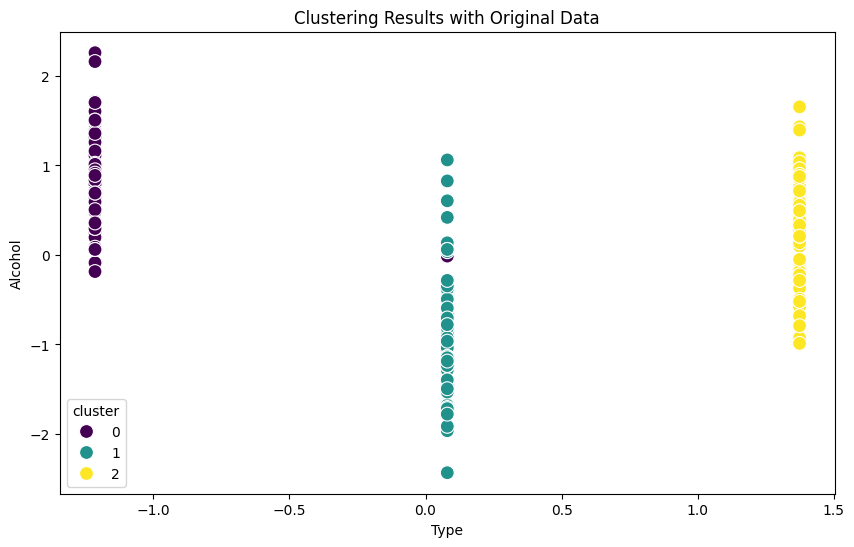

In [13]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df['cluster'], palette='viridis', s=100)
plt.title('Clustering Results with Original Data')
plt.show()


In [15]:
# K-means clustering on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df_pca['cluster'] = kmeans_pca.fit_predict(df_pca)

print("PCA-transformed dataset with clusters:")
print(df_pca.head())


PCA-transformed dataset with clusters:
        PC1       PC2  cluster
0 -3.522934 -1.453098        2
1 -2.528858  0.330019        2
2 -2.785029 -1.036936        2
3 -3.922588 -2.768210        2
4 -1.407511 -0.867773        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


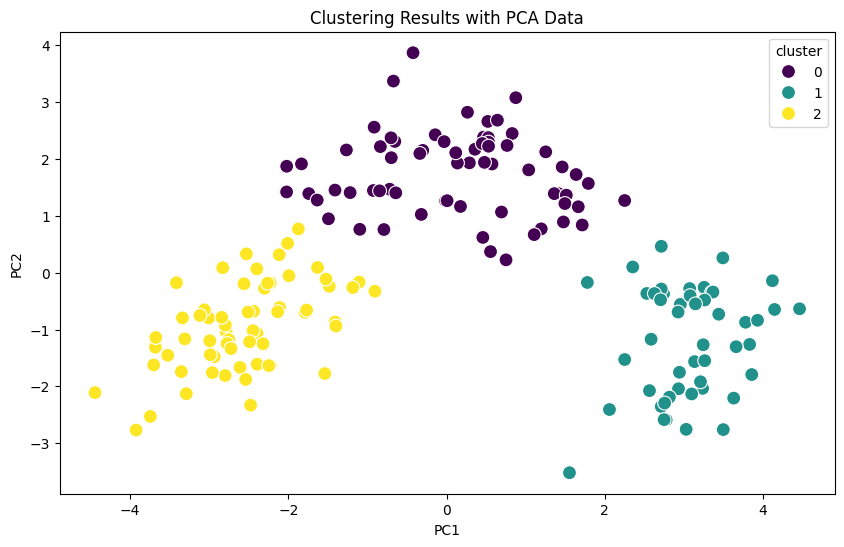

In [16]:
# Plot clusters from PCA data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['cluster'], palette='viridis', s=100)
plt.title('Clustering Results with PCA Data')
plt.show()


In [17]:
# Compare clustering results
comparison = pd.crosstab(df['cluster'], df_pca['cluster'])
print("Comparison of Clustering Results:")
print(comparison)


Comparison of Clustering Results:
cluster   0   1   2
cluster            
0         0   0  61
1        67   0   1
2         0  49   0
